#### Logistic Regression的损失函数为：$$loss=-(ylog(\widehat{y})+(1-y)log(1-\widehat{y}))$$
#### 其中，$y$是真实的label，$\widehat{y}$是预测的结果

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(345)

(100, 2)
(100, 1)


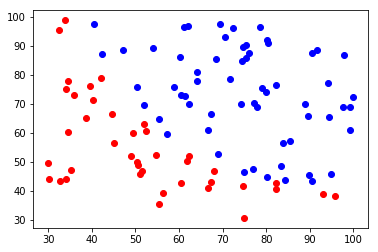

In [3]:
# 读取数据，并绘制点图
with open('data.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    x_train = []  # 存放特征
    y_train = []  # 存放标签
    for line in lines:
        line = line.strip('\n')       # 去点字符串两端的换行符
        line_split = line.split(',')  # 对每一行按英文逗号(,)分隔
        x_train.append([float(line_split[0]), float(line_split[1])])  # 添加特征
        y_train.append(float(line_split[2]))                          # 添加标签
x_train = np.array(x_train, dtype=np.float32)  # 将python数组转换为numpy数组
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)
for i in range(len(x_train)):
    if y_train[i] == 0.:
        plt.plot(x_train[i][0], x_train[i][1], 'ro', label='Class 0')
    else:
        plt.plot(x_train[i][0], x_train[i][1], 'bo', label='Class 1')
plt.show()
# 数据标准化
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

In [4]:
# 将numpy数组转换为变量
x_train = Variable(torch.from_numpy(x_train))
y_train = Variable(torch.from_numpy(y_train))

In [5]:
# 定义sigmoid函数
def sigmoid(x):
    return 1.0 / (1. + torch.exp(-x))
x = torch.FloatTensor([[1], [2]])
sigmoid(x)

tensor([[0.7311],
        [0.8808]])

In [6]:
# 声明变量并随机初始化
w = Variable(torch.randn(2, 1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

In [7]:
# 定义线性部分：y = xw + b
def linear_model(x):
    return torch.mm(x, w) + b

In [8]:
x1 = torch.FloatTensor([[1], [2]])
x2 = torch.FloatTensor([[3], [5]])
x1 * x2  # 对应元素相乘

tensor([[ 3.],
        [10.]])

In [9]:
# 定义交叉熵损失函数
def get_loss(y_, y):
    cross_entropy = -(y * torch.log(y_) + (1. - y) * torch.log(1. - y_))
    return torch.mean(cross_entropy)

In [10]:
y_linear = linear_model(x_train)
y_ = sigmoid(y_linear)
# y_ = torch.clamp(y_, min=1e-12)
y_

tensor([[0.6704],
        [0.9623],
        [0.7329],
        [0.2785],
        [0.2678],
        [0.8523],
        [0.1555],
        [0.7580],
        [0.1532],
        [0.7204],
        [0.6947],
        [0.9035],
        [0.2272],
        [0.1064],
        [0.6539],
        [0.2921],
        [0.7255],
        [0.8078],
        [0.1353],
        [0.7287],
        [0.8487],
        [0.3087],
        [0.8841],
        [0.9547],
        [0.3726],
        [0.5203],
        [0.7388],
        [0.7110],
        [0.8103],
        [0.8063],
        [0.4809],
        [0.4943],
        [0.7280],
        [0.6352],
        [0.7192],
        [0.8356],
        [0.3339],
        [0.3203],
        [0.8166],
        [0.7151],
        [0.5231],
        [0.8934],
        [0.2701],
        [0.7747],
        [0.9018],
        [0.7878],
        [0.3562],
        [0.0698],
        [0.1479],
        [0.0788],
        [0.2761],
        [0.2917],
        [0.6670],
        [0.8726],
        [0.8784],
        [0

In [11]:
loss = get_loss(y_, y_train)

In [12]:
loss

tensor(1.4701, grad_fn=<MeanBackward0>)

In [13]:
loss.backward()

In [14]:
w.data = w.data - 0.1 * w.grad
b.data = b.data - 0.1 * b.grad

In [15]:
w

tensor([[-0.7859],
        [-1.2202]], requires_grad=True)

In [16]:
b

tensor([0.1997], requires_grad=True)

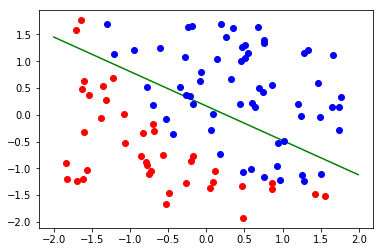

In [17]:
plot_x = np.arange(-2.0, 2., 0.01)
plot_y = (-w.data[0].item() * plot_x - b.data.item()) / w.data[1].item()
plt.plot(plot_x, plot_y, 'g')
for i in range(len(x_train)):
    if y_train[i] == 0.:
        plt.plot(x_train[i][0], x_train[i][1], 'ro', label='Class 0')
    else:
        plt.plot(x_train[i][0], x_train[i][1], 'bo', label='Class 1')
plt.show()

In [18]:
Epochs = 200
train_loss = []
for epoch in range(200):
    y_linear = linear_model(x_train)
    y_ = sigmoid(y_linear)
    # y_ = torch.clamp(y_, min=1e-12)
    loss = get_loss(y_, y_train)
    train_loss.append(loss.data.item())
    
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    w.data = w.data - 0.1 * w.grad
    b.data = b.data - 0.1 * b.grad
    if (epoch + 1) % 10 == 0:
        print('epoch: {:3d}, loss: {:.6f}'.format(epoch + 1, loss.data.item()))

epoch:  10, loss: 1.092977
epoch:  20, loss: 0.824750
epoch:  30, loss: 0.652775
epoch:  40, loss: 0.545869
epoch:  50, loss: 0.477361
epoch:  60, loss: 0.431059
epoch:  70, loss: 0.398064
epoch:  80, loss: 0.373463
epoch:  90, loss: 0.354424
epoch: 100, loss: 0.339241
epoch: 110, loss: 0.326831
epoch: 120, loss: 0.316481
epoch: 130, loss: 0.307705
epoch: 140, loss: 0.300157
epoch: 150, loss: 0.293589
epoch: 160, loss: 0.287815
epoch: 170, loss: 0.282694
epoch: 180, loss: 0.278118
epoch: 190, loss: 0.274001
epoch: 200, loss: 0.270276


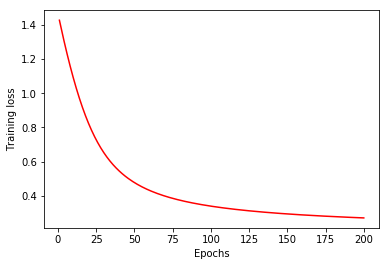

In [19]:
plt.plot(range(1, Epochs + 1), train_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

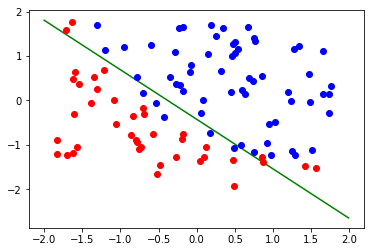

In [20]:
plot_x = np.arange(-2.0, 2., 0.01)
plot_y = (-w.data[0].item() * plot_x - b.data.item())/ w.data[1].item()
plt.plot(plot_x, plot_y, 'g')
for i in range(len(x_train)):
    if y_train[i] == 0.:
        plt.plot(x_train[i][0], x_train[i][1], 'ro', label='Class 0')
    else:
        plt.plot(x_train[i][0], x_train[i][1], 'bo', label='Class 1')
plt.show()

#### 以上方法是我们自己定义损失函数，参数更新方式也很繁琐。假如参数有很多，比如有一百个，那么我们用上面的方式更新参数就需要一百行来实现。在PyTorch中，它已经为我们封装好了常用的损失函数和优化器torch.optim，让我能能够更方便地搭建模型。
#### 使用PyTorch中的优化器torch.optim需要另外一种数据类型--nn.Parameter，这个数据类型本质上和Variable是一样的，只不过nn.Parameter是默认要求梯度的，而Variable默认是不求梯度的。torch.optim中包含了常用的优化算法：梯度下降等。

In [21]:
# 使用torch.optim更新参数
from torch import nn

w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.randn(1))

def logistic_regression(x):
    return torch.sigmoid(torch.mm(x, w) + b)

optimizer = torch.optim.SGD([w, b], lr=0.1)  # SGD-随机梯度下降，[w, b]-参数列表，lr-学习率

In [22]:
# 进行参数更新
Epochs = 200
for epoch in range(Epochs):
    # 前向传播
    y_ = logistic_regression(x_train)
    loss = get_loss(y_, y_train)
    # 反向传播
    optimizer.zero_grad()  # 令优化器中的参数的梯度为0
    loss.backward()        # 自动求导
    # 更新参数
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('epoch: {:3d}, loss: {:.6f}'.format(epoch + 1, loss.data.item()))

epoch:  10, loss: 0.442263
epoch:  20, loss: 0.405287
epoch:  30, loss: 0.378275
epoch:  40, loss: 0.357730
epoch:  50, loss: 0.341578
epoch:  60, loss: 0.328528
epoch:  70, loss: 0.317745
epoch:  80, loss: 0.308669
epoch:  90, loss: 0.300909
epoch: 100, loss: 0.294188
epoch: 110, loss: 0.288301
epoch: 120, loss: 0.283096
epoch: 130, loss: 0.278457
epoch: 140, loss: 0.274291
epoch: 150, loss: 0.270527
epoch: 160, loss: 0.267107
epoch: 170, loss: 0.263985
epoch: 180, loss: 0.261122
epoch: 190, loss: 0.258487
epoch: 200, loss: 0.256051


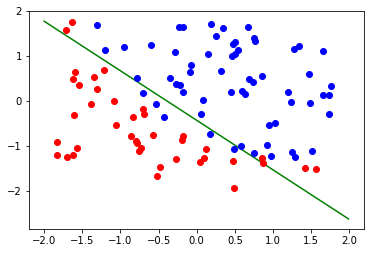

In [23]:
plot_x = np.arange(-2.0, 2., 0.01)
plot_y = (-w.data[0].item() * plot_x - b.data.item())/ w.data[1].item()
plt.plot(plot_x, plot_y, 'g')
for i in range(len(x_train)):
    if y_train[i] == 0.:
        plt.plot(x_train[i][0], x_train[i][1], 'ro', label='Class 0')
    else:
        plt.plot(x_train[i][0], x_train[i][1], 'bo', label='Class 1')
plt.show()

#### 前面我们使用了自己写的 loss，其实 PyTorch 已经为我们写好了一些常见的 loss，比如线性回归里面的 loss 是 nn.MSE()，而 Logistic 回归的二分类 loss 在 PyTorch 中是 nn.BCEWithLogitsLoss()。PyTorch 出于稳定性考虑，将模型的 Sigmoid 操作和最后的 loss 都合在了 nn.BCEWithLogitsLoss()，所以我们使用 PyTorch 自带的 loss 就不需要再加上 Sigmoid 操作了

In [24]:
# 使用自带的损失函数
criterion = nn.BCEWithLogitsLoss()  # 声明一个损失函数实例

w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.randn(1))

def logistic_reg(x):
    # 因为nn.BCEWithLogitsLoss()中包含了sigmoid操作，所以在这里就不需要进行sigmoid的了
    return torch.mm(x, w) + b

optimizer = torch.optim.SGD([w, b], lr=0.1)

In [25]:
# 进行参数更新
Epochs = 200
for epoch in range(Epochs):
    # 前向传播
    y_ = logistic_reg(x_train)
    loss = criterion(y_, y_train)
    # 反向传播
    optimizer.zero_grad()  # 令优化器中的参数的梯度为0
    loss.backward()        # 自动求导
    # 更新参数
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('epoch: {:3d}, loss: {:.6f}'.format(epoch + 1, loss.data.item()))

epoch:  10, loss: 0.473816
epoch:  20, loss: 0.423681
epoch:  30, loss: 0.388526
epoch:  40, loss: 0.363012
epoch:  50, loss: 0.343858
epoch:  60, loss: 0.329016
epoch:  70, loss: 0.317186
epoch:  80, loss: 0.307518
epoch:  90, loss: 0.299447
epoch: 100, loss: 0.292585
epoch: 110, loss: 0.286659
epoch: 120, loss: 0.281476
epoch: 130, loss: 0.276893
epoch: 140, loss: 0.272801
epoch: 150, loss: 0.269119
epoch: 160, loss: 0.265783
epoch: 170, loss: 0.262744
epoch: 180, loss: 0.259960
epoch: 190, loss: 0.257399
epoch: 200, loss: 0.255033


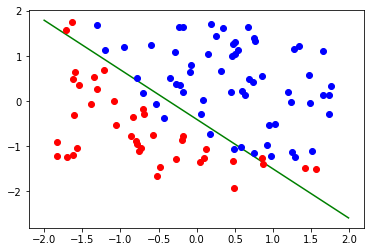

In [26]:
plot_x = np.arange(-2.0, 2., 0.01)
plot_y = (-w.data[0].item() * plot_x - b.data.item())/ w.data[1].item()
plt.plot(plot_x, plot_y, 'g')
for i in range(len(x_train)):
    if y_train[i] == 0.:
        plt.plot(x_train[i][0], x_train[i][1], 'ro', label='Class 0')
    else:
        plt.plot(x_train[i][0], x_train[i][1], 'bo', label='Class 1')
plt.show()